# Introduction 

### Time Series is a sequence of information which attaches a time period to each value

### Interval between the  recording one point of time and the next is called a time period

### Frequency = How often the values of the data set are recorded 

### To analyze the time periods in a meaningful way :
### All time periods must be EQUAL AND CLEARLY DEFINED, which would result in a CONSTANT 'Frequency'
### Frequencies are generally measured in daily, monthly, quaterly, yearly
### Paterns observed in the Time Series are expected to persist in future
### 'Time Dependency' = The values for every period are affected by outside factors and by the values of past period

## Notation in Time Series 

### Time Series Variable X,Y
### T = entire period
### t = single period data

### $X_{t}$  = current period
### $X_{t-1}$  = previous period
### $X_{t+1}$  = next period

## Peculiarities of Time Series Data

### Intervals need to be identical
### We can adjust the frequency of the data set based on the values we are interested in eg : aggregating daily data to give us monthly data
### Time Series data needs cronological order 
### For train test data we need to pick a cutoff point in the data. The data before the cutoff point is the training data and the data after the point is the testing data
### Time Series data never satisfies Gauss Markov assumptions hence the data is never a smooth curve.
### Time Series data assumes that past patterns repeat themselves in the future.

## Loading the data

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

## Examining the data

In [4]:
df_comp.head()


,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### We usually use dates as indexes to study time series data
### Here we have 4 market indices which we are studying
### a. S&P 500 =spx  (USA)
### b. DAX 30 = dax   (Germany)
### c. FTSE 100 = ftse (London(UK))
### d. NIKKEI 225 = nikkei (Japan)

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [7]:
df_comp['spx'].isna().sum()

0

## Plotting the data

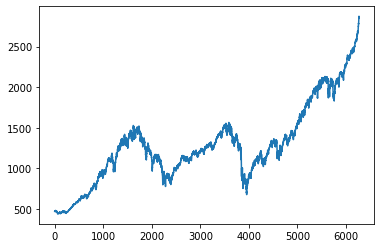

In [8]:
df_comp['spx'].plot()

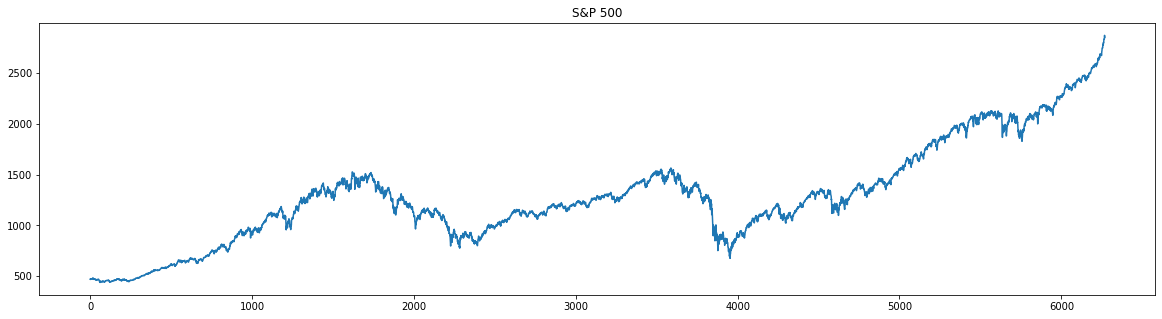

In [9]:
df_comp['spx'].plot(title = 'S&P 500', figsize = (20,5))

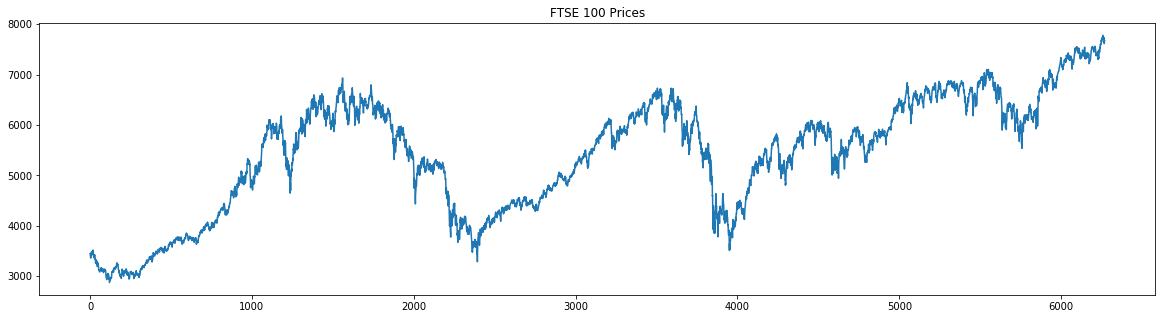

In [10]:
df_comp['ftse'].plot(title = 'FTSE 100 Prices', figsize = (20,5))

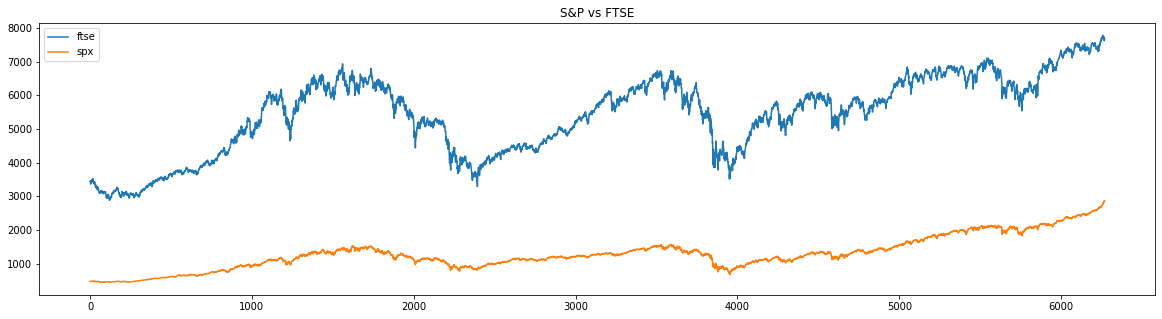

In [11]:
df_comp['ftse'].plot(title = 'FTSE 100 Prices', figsize = (20,5))
df_comp['spx'].plot(title = 'S&P 500', figsize = (20,5))
plt.title("S&P vs FTSE")
plt.legend()
plt.show()

### Because of the change in the magnitude we observe that S&P is much flatter than FTSE

## Q-Q PLOT

### Quantile - Quantile(QQ) plot is used to determine whether a data is distributed in a certain way. Unless specified a QQ plot shows how the data fits a normal distribution

In [12]:
import scipy.stats
import pylab

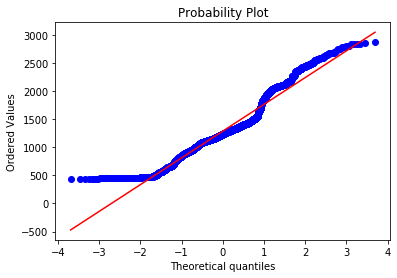

In [13]:
scipy.stats.probplot(df_comp['spx'],plot=pylab)
pylab.show()

### The QQ plolt plot takes all the values a variable can take and arranges them in the ascending order. 
### The Y axis is the price where the highest price is at the top and the lowest one at the bottom.
### The X axis represents the theoretical quantiles (A single Quantile is 25%  hence 4 quantiles for covering 100% of the data) or we can say how many standard deviations from the mean are the data points.
### The red line indicates what the data should follow if it follows normal distribution.


## Data Cleaning

In [14]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


## Coverting Text to Date

In [15]:
df_comp['date']=pd.to_datetime(df_comp['date'],dayfirst=True) # This command assumes that the string is in mm/dd/yyyy format else we need to specify dayfirst=True for dd/mm/yyyy

In [16]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting Date as Index

In [18]:
df_comp.set_index("date",inplace=True)

In [19]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [20]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Setting the Desired Frequency

In [21]:
df_comp.asfreq('d').head() ## This can take in values like d=daily, m=monthly, w= weekly,h=hourly a = annual or yearly data,

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


### We need th values only for business days and not daily.

In [22]:
df_comp = df_comp.asfreq('b')

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Filling Missing Values

In [24]:
df_comp.isna()
## True indicates missing values and False indicates non null values

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [25]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
df_comp[df_comp.isna()['dax'] == True]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


### fillna() method
### 1. ffill: Front filling = Assigns the value from the previous period
### 2. bfill : Backward Fill = Assigns the value from the next period
### 3. Assigning the same value in the df column eg: Assign the average value for the missing entries

In [27]:
df_comp['spx']=df_comp['spx'].fillna(method='bfill')

In [28]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [29]:
df_comp['ftse']= df_comp['ftse'].fillna(method='ffill')

In [30]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [31]:
df_comp['dax']= df_comp['dax'].fillna(df_comp['dax'].mean())

In [32]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [33]:
df_comp['nikkei']= df_comp['nikkei'].fillna(method='ffill')

In [34]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Adding/Removing  Columns in df

In [35]:
df_comp['market_value'] = df_comp['spx']

In [36]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.648174,6080.063363,5423.679824,14597.672753,1288.648174
std,487.863901,2752.604984,1145.616719,4043.795272,487.863901
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [37]:
del df_comp['spx']
del df_comp['dax']
del df_comp['nikkei']
del df_comp['ftse']

In [38]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.648174
std,487.863901
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the data

### We need to split our data into 2 sets: training set and testing set
### Compare predictions to the actual values and the closer the forecast the better is the model

### We cannot shuffle the data in  time series as the order of the dates matter hence we choose a cut off date and all data before that date is the training data and remaining data is the testing data

In [39]:
size = int(len(df_comp)*0.8)

In [40]:
df = df_comp[:size]

In [41]:
df_test= df_comp[size:]

# PART 2 

## White Noise

### White Noise is a special type of time series, where the data does not follow a pattern hence it is unpredictible

### For a Seies to be considered as White Noise the following conditions need to be met:
### a) Constant mean (mu)
### b) Constant Variance (sigma squared)
### c) No autocorrelation

### Autocorrelation 
### ρ= corr($X_{t}$,$X_{t-1}$)

In [42]:
print('\u03C1')
## https://pythonforundergradengineers.com/unicode-characters-in-python.html

ρ


### No autocorrelation means that there is no clear relationship between past and present values
### Hence White Noise is a sequence of random data where every value has a time period attached to it 

In [43]:
wn = np.random.normal(loc=df['market_value'].mean(),scale=df['market_value'].std(),size = len(df))

In [44]:
df['wn'] = wn

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.664167,1090.744796
std,292.559713,294.511274
min,438.920000,81.903416
25%,914.835752,891.237408
50%,1144.650000,1092.209351
75%,1316.280729,1288.304453
max,1570.252238,2128.614209


Text(0.5, 1.0, 'White Noise Time Series')

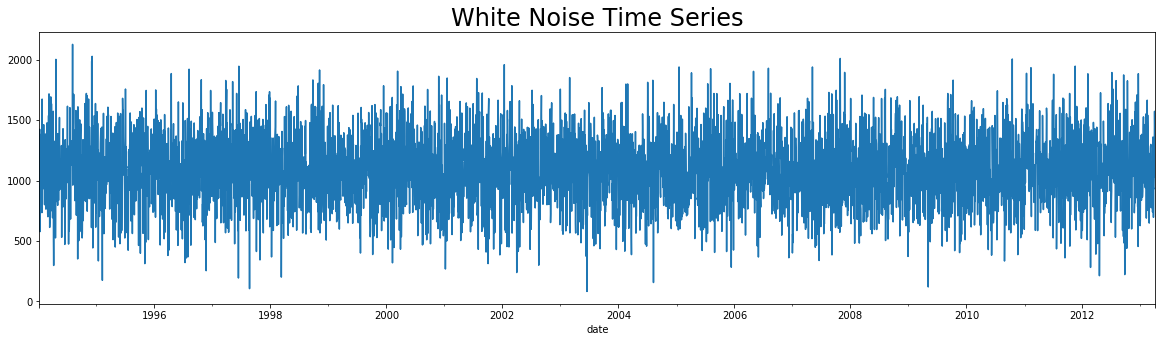

In [46]:
df['wn'].plot(figsize= (20,5))
plt.title('White Noise Time Series', size=24)

Text(0.5, 1.0, 'S&P Prices')

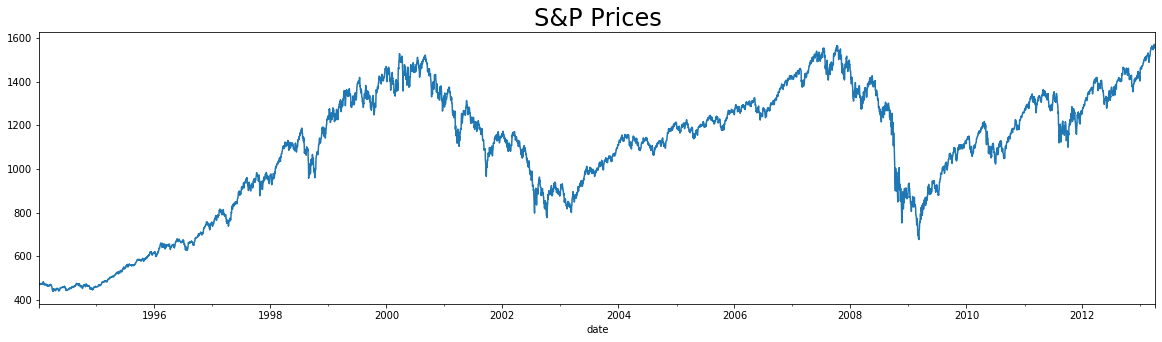

In [47]:
df['market_value'].plot(figsize= (20,5))
plt.title('S&P Prices', size=24)

(0, 2300)

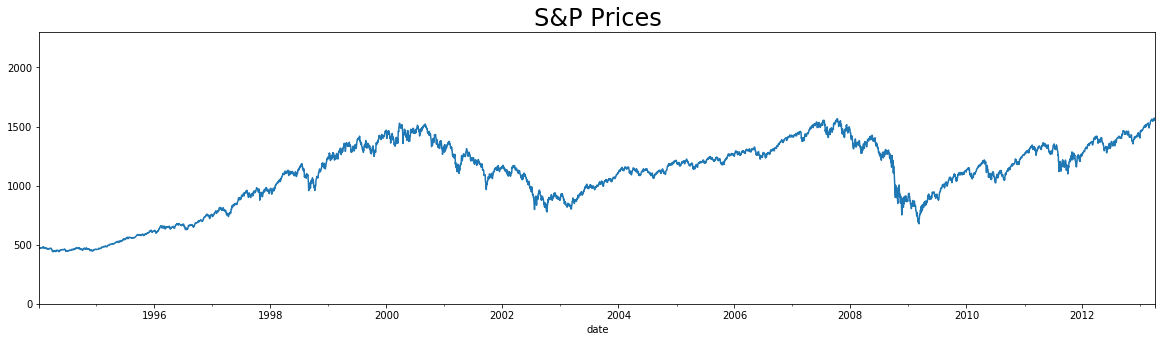

In [48]:
df['market_value'].plot(figsize= (20,5))
plt.title('S&P Prices', size=24)
plt.ylim(0,2300)

Text(0.5, 1.0, 'White Noise Time Series')

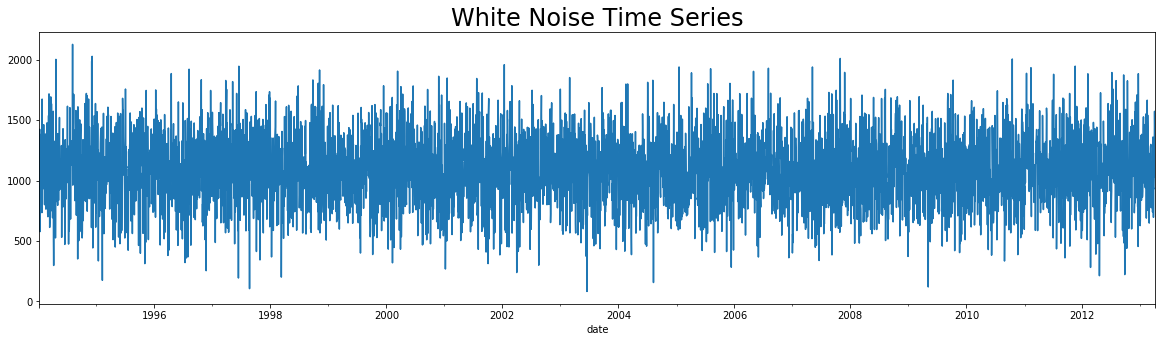

In [49]:
df['wn'].plot(figsize= (20,5))
plt.title('White Noise Time Series', size=24)


## RANDOM WALK

### A Random Walk is a special type of time series where values tend to persist over time and the differences between periods are simply white noise

## $P_{t}$ = Prices
## $ε_{t}$ = residuals

## Hence

## $P_{t}$ = $P_{t-1}$ +  $ε_{t}$

## Here  $ε_{t}$ ~ WN(μ,σ^2)

In [50]:
rw = pd.read_csv("RandWalk.csv")

In [51]:
rw['date'] =pd.to_datetime(rw['date'],dayfirst=True)

In [52]:
rw.set_index('date', inplace=True)

In [53]:
rw = rw.asfreq('b')

In [54]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [55]:
df['rw'] = rw['price']

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df['rw']

date
1994-01-07    1122.139662
1994-01-10    1080.347860
1994-01-11    1082.095245
1994-01-12    1083.639265
1994-01-13    1067.146255
                 ...     
2013-04-01    2263.675474
2013-04-02    2225.000870
2013-04-03    2190.787688
2013-04-04    2195.240033
2013-04-05    2152.992143
Freq: B, Name: rw, Length: 5021, dtype: float64

Text(0.5, 1.0, 'Random Walk TS')

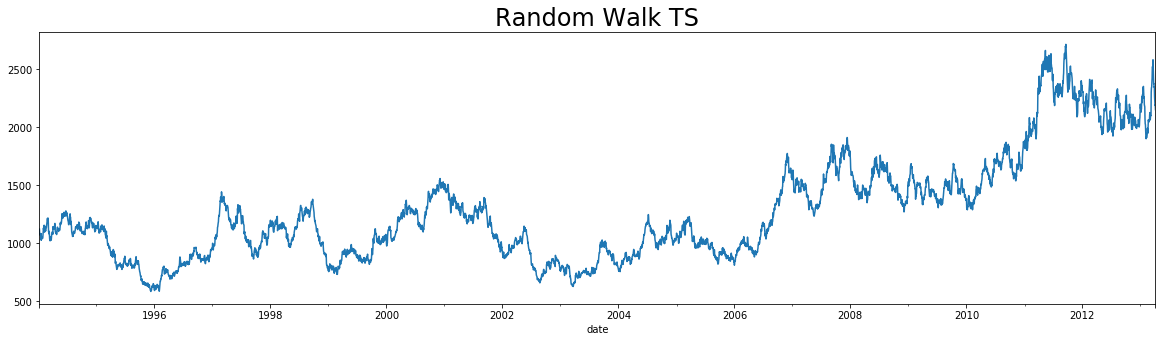

In [57]:
df['rw'].plot(figsize= (20,5))
plt.title('Random Walk TS', size=24)

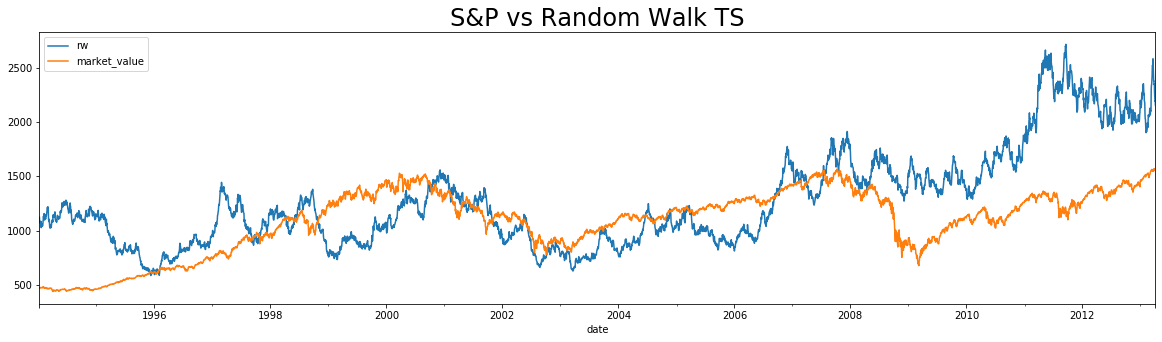

In [58]:
df['rw'].plot(figsize= (20,5))
df['market_value'].plot(figsize= (20,5))
plt.title('S&P vs Random Walk TS', size=24)
plt.legend()

### We see that both the series have small variations between consecutive time periods
### Both have Cyclical increase and decrease in short periods of time

### Market Efficiency measures the level of difficulty in forecasting correct future values

## Stationarity

### We can classify a Time Series as a covariance stationary if it satisfies 3 main assumptions:
### 1. Constant Mean
### 2. Constant Variance
### 3. Consistent covariance between periods at identical distance eg. Cov(x1,x4) = Cov(x3,x6)

### To check if our data is stationary we use the Dickey-Fuller test

### The null hypothesis of this test is that the 1 lag autocorrelation coeff is less than 1
### The alternate hypothesis is that 1 lag autocorrelation coeff  = 1

### If test statistic < critical value we reject the null and data comes from stationary process

In [59]:
import statsmodels.tsa.stattools as sts

In [60]:
sts.adfuller(df['market_value'])

(-1.7373926676365983,
 0.41195686370167506,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39906.520821878556)

### In the output we have ( test statistic, p value, number of lags, number of observations used  and the last line is the maximized information criteria: lower the value the easier it is make predictions)

In [61]:
sts.adfuller(df['wn'])

(-69.68783916578577,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70884.1429686111)

In [62]:
sts.adfuller(df['rw'])

(-1.3286073927689728,
 0.615984918161738,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

### Hence random walk is a non stationary process

## Seasonality

### It means that certain trends appear on a cyclical basis

### We can decompose or split the Time Series into 3 components:
### 1. Trend      = Pattern
### 2. Seasonal= Cyclical Effects
### 3. Residual= Error of Prediction

## Naive Decomposition:
### In Naive Decomposition we observe a linear relation between the 3 parts and Time Series 

### Naive Decompostion is of 2 types :
### 1. Additive
### 2. Multiplicative

### In Additive the observed Time Series = trend + seasonal + residual
### In Multiplicative observed  Time Series = trend * seasonal * residual

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

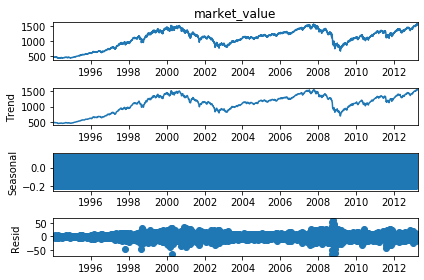

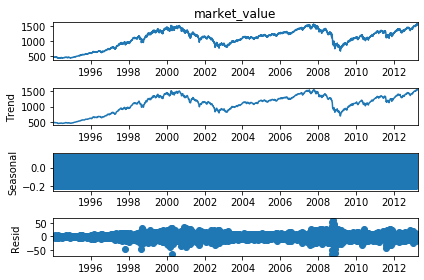

In [64]:
s_dec_additive = seasonal_decompose(df['market_value'],model='additive')
s_dec_additive.plot()

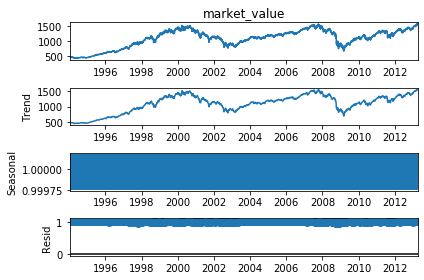

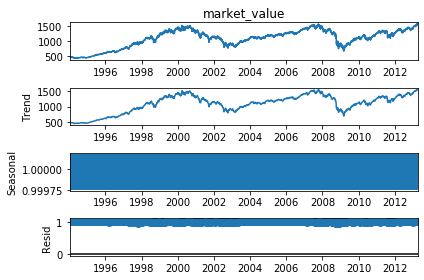

In [65]:
s_dec_multiplicative = seasonal_decompose(df['market_value'],model='multiplicative')
s_dec_multiplicative.plot()

## Correlation between Past and Present Values

### Correlation measures the similarity in the change of values of 2 series
### Autocorrelation is the correlation between a sequence and itself
### In TS data Autocorrelation implies that there is a correlation between the values of the time series and a lagged version of itself

## Autocorrelation Function(ACF)

### The ACF computes the Autocorrelation between many lags simultaneously 

In [66]:
import statsmodels.graphics.tsaplots as sgt

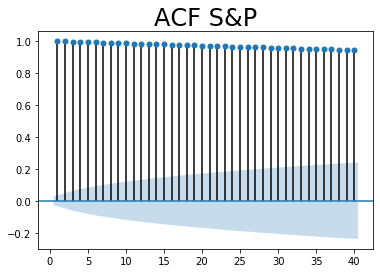

In [67]:
sgt.plot_acf(df['market_value'], lags=40,zero=False) # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("ACF S&P", size=24)
plt.show()

### As the time period increases the ACF value varies. This implies that todays value will be a reflection of yesterdays value rather than a months old price

### Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

### Correlation lies between -1 and 1 and because we have given 40 lag periods we have the x axis till 40 

## ACF of wn

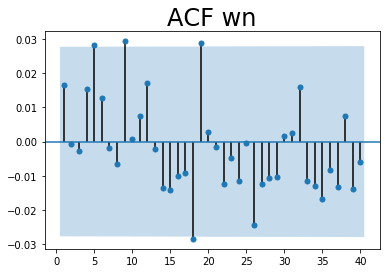

In [68]:
sgt.plot_acf(df['wn'], lags=40,zero=False) # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("ACF wn", size=24)
plt.show()

## The entire values wall between the blue region hence  we can say that the Autocorrelation is insignificant and WN rules are maintained

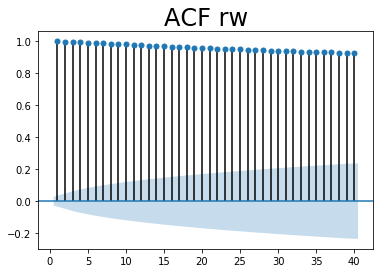

In [69]:
sgt.plot_acf(df['rw'], lags=40,zero=False) # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("ACF rw", size=24)
plt.show()

## Partial AutoCorrelation Function (PACF)

### A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

### The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

### — Page 81, Section 4.5.6 Partial Autocorrelations, Introductory Time Series with R.

### The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

### It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation

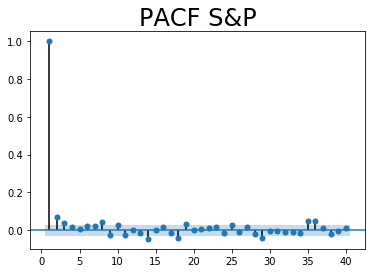

In [70]:
sgt.plot_pacf(df['market_value'], lags=40,zero=False,method='ols') # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("PACF S&P", size=24)
plt.show()

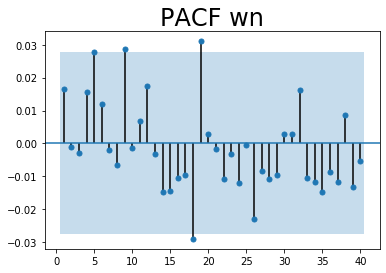

In [71]:
sgt.plot_pacf(df['wn'], lags=40,zero=False,method='ols') # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("PACF wn", size=24)
plt.show()

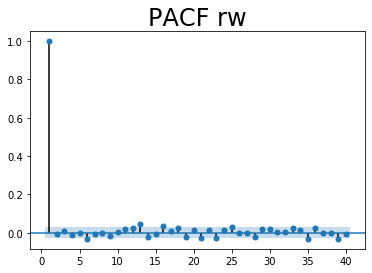

In [72]:
sgt.plot_pacf(df['rw'], lags=40,zero=False,method='ols') # by practice we see the first 40 lags and by zero= False we mean that the current period value is not plotted
plt.title("PACF rw", size=24)
plt.show()

## What is the difference between ACF and PACF?
### ACF measures the accumulated effects past lags have on the current value, while PACF measures the direct effect.

# PART 3

## Picking the correct model

### 1. Significant Coefficients ie if by adding more coeff and creating a complex model we are not able to get a better predictive power then we revert back to a simpler model (Ocam's Razor). The new coeff should be significantly different than zero.

### 2. Parsimonious( as simple as possible) : Unless and otherwise we get significantly better predictions we would prefer to take a simpler model than a complex model


### To check if the predictions are significantly better we use the Log-Likelihood Ratio test. The LLR test  can only be applied to models with different degrees of freedom.

### Whenever we have to compare many models with same total number of lags :The lower the Information Criteria  the less data the model requires to make the prediction
#### 2 criterias are AIC and BIC
#### We choose models with lower AIC and BIC values

### 3 . The RESIDUALS should resemble White Noise. This would imply that no pattern was missed.

### If we are comparing 2 models and we want to choose the better fit then we choose the one with Higher Log Likelihood and Lower Information Criteria

## Modelling Autoregression : The AR Model

### The AR Model relies on past period values only to predict present period values
### It is a linear model where current period values are a sum of past outcomes multiplied by a numeric factor 

##  $x_{t}$ = $\varphi *x_{t-1}$ +  $C$ + $\epsilon_{t}$

## $x_{t-1}$  = The value of x during the previous period
## $\varphi$  = Any numeric constant by which we multiply the lagged variable 
## -1 <$\varphi$ <1
##  $\epsilon_{t}$   = The difference between our prediction for period 't' and the correct value

## Hence we can say that the equation has 3 parts
### 1. Some portion of prices in the last period 
### 2. Constant benchmark(C)
### 3. Unpredictable shock (epsilon)

## More number of lags we include implies more complicated model implies more coeffs to determine 

## Our AR model should have the appropriate number of lags 
## For example a weather data should have a weeks data for the prediction hence AR(7) is appropriate
## AR(2) looks like = C+ phi1*X(t-1) + phi2*X(t-2) + Epsilon(t)
## More lags implies More complicated model implies More coeffs implies More likely that some coeff are not significant 

## In Summary an AR model is called Auto Regressive model because it uses lagged version of itself(auto) to conduct the regression 

## We have used S&P for the previous codes so using FTSE for these

In [73]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp['date'] = pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [74]:
df_comp['market_value'] = df_comp['ftse']

In [75]:
df_comp.head(1)

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.9,2224.95,3445.98,18124.01,3445.98


In [76]:
del df_comp['spx'];del df_comp['dax'];del df_comp['nikkei'];del df_comp['ftse']
size = int(len(df_comp) *0.8)
df,df_test= df_comp.iloc[:size],df_comp.iloc[size:]

# ACF FTSE

In [77]:
import statsmodels.graphics.tsaplots as sgt

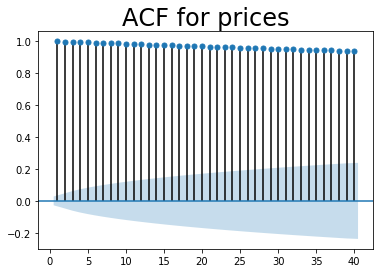

In [78]:
sgt.plot_acf(df['market_value'],zero=False,lags=40)
plt.title("ACF for prices" , size=24)
plt.show()

# PACF FTSE

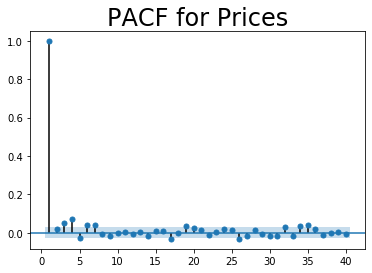

In [79]:
sgt.plot_pacf(df['market_value'],lags=40,method=('ols'),zero=False)
plt.title("PACF for Prices", size=24)
plt.show()

# Summary Question: 

## Which do we use to select the correct AR model and why : the ACF or the PACF?
### The PACF because it shows the individual effect each past value has on the current one.

# 35. Fitting an AR(1) Model for Index Prices

In [80]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

# The AR(1) Model

In [81]:
model_ar = ARMA(df['market_value'],order=(1,0))

## Here in the order parameter 1 represents = number of past values we wish to incorporate into the model
## 0 represents that we are not taking any of the residual values into consideration.

In [82]:
results_ar = model_ar.fit()

In [83]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Sun, 15 Mar 2020   AIC                          55251.195
Time:                        14:34:45   BIC                          55270.759
Sample:                    01-07-1994   HQIC                         55258.051
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5038.0834    487.182     10.341      0.000    4083.225    5992.942
ar.L1.market_value     0.9985      0.001   1298.634      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Why does the model estimate 2 values, when we are only using AR(1) model?
## The model always assumes there might be a constant in the model (even if it turns out to be non-significant)

#  Higher Lag AR Models

In [84]:
model_ar_2 = ARMA(df['market_value'],order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Sun, 15 Mar 2020   AIC                          55251.742
Time:                        14:34:46   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    495.703     10.268      0.000    4118.082    6061.201
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4642           +0.0000j           58.4642            0.5000
-----------------------------------------------------------------------------
"""

### We observe that the p value of  coeff 2 is greater that 0.05 hence it can be rejected. This means that prices 2 days ago do not significantly affect todays prices

### As the number of lags are increased we run the risk of overfitting

In [85]:
model_ar_3 = ARMA(df['market_value'],order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.056
Method:                       css-mle   S.D. of innovations             59.180
Date:                Sun, 15 Mar 2020   AIC                          55242.113
Time:                        14:34:47   BIC                          55274.720
Sample:                    01-07-1994   HQIC                         55253.539
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5366.2964    669.313      8.018      0.000    4054.467    6678.126
ar.L1.market_value     0.9806      0.014     69.641      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.470      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1854           -4.5136j            4.5174           -0.2565
AR.3           -0.1854           +4.5136j            4.5174            0.2565
-----------------------------------------------------------------------------
"""

In [86]:
model_ar_4 = ARMA(df['market_value'],order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Sun, 15 Mar 2020   AIC                          55217.130
Time:                        14:34:48   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    559.994      9.089      0.000    3992.072    6187.210
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

### We prefer models with HIGHER Log Likelyhood but LOWER Information Criterion

## Log Likelihood Test (LLR)

In [87]:
def LLR_test(mod_1,mod_2,DF=1):# here mod_1 mod_2 are models we want to compare and DF=degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR= (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## Comparing Higher Lag AR Models

In [88]:
# LLR_test(model_ar_2,model_ar_3)

In [89]:
 p = chi2.sf(2*((results_ar_3.llf)-(results_ar_2.llf)),1).round(3)
print(p)

0.001


In [90]:
LLR_test(model_ar_3,model_ar_4)

0.0

In [91]:
model_ar_5 = ARMA(df['market_value'],order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
#print("LLR test : "+ str(LLR_test(model_ar_4,model_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Sun, 15 Mar 2020   AIC                          55214.697
Time:                        14:34:52   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    543.579      9.363      0.000    4024.245    6155.037
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [92]:
model_ar_6 = ARMA(df['market_value'],order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("LLR test: "+ str(LLR_test(model_ar_5,model_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Sun, 15 Mar 2020   AIC                          55208.947
Time:                        14:34:55   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    565.255      9.004      0.000    3981.761    6197.522
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [93]:
model_ar_7 = ARMA(df['market_value'],order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("LLR test: "+ str(LLR_test(model_ar_6,model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27592.165
Method:                       css-mle   S.D. of innovations             58.898
Date:                Sun, 15 Mar 2020   AIC                          55202.331
Time:                        14:35:03   BIC                          55261.023
Sample:                    01-07-1994   HQIC                         55222.897
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5485.3413    984.456      5.572      0.000    3555.843    7414.839
ar.L1.market_value     0.9787      0.014     69.621      0.000       0.951       1.006
ar.L2.market_value  

In [94]:
model_ar_8 = ARMA(df['market_value'],order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("LLR test : "+ str(LLR_test(model_ar_8,model_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Sun, 15 Mar 2020   AIC                          55203.478
Time:                        14:35:14   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    584.998      8.700      0.000    3943.066    6236.216
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

## So at Lag 8 we see :
### 1. Non significant p value for LLR Test
### 2. Non significant p value for highest lag coeff

In [95]:
print("LLR test : "+ str(LLR_test(model_ar,model_ar_7,DF=6)))

LLR test : 0.0


### Hence we take the ar_7 model for the predictions as it has a significant p value  ie p <0.05

## We choose AR(7) over AR(8) because:
### 1. AR(8) fails the LLR test
### 2. AR(8) does not provide significantly higher Log Likelihood
### 3. AR(8) has higher Information Criteria

# Using Returns instead of Prices

## AR models really well on Stationary data but perform poorly on Non Stationary data

In [96]:
sts.adfuller(df['market_value'])

(-1.90415514188369,
 0.3301089327702815,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### Hence we can say that the data are from a non stationary process
### We should not rely on AR models to make accurate forecasts
### We need to transform the data so that it fits the 'stationarity' assumptions

## Using Returns:

In [97]:
df['returns'] = df['market_value'].pct_change(1).mul(100)
df = df.iloc[1:]  

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### we do this because for the percentage change we will not have any value for the first row 

In [98]:
sts.adfuller(df['returns']) # here we see that the test statistic falls very far from the 1% confidence level of -3.43 hence we can be confident that the data is a stationary process

(-12.770265719497212,
 7.798058336039225e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

### here we see that the test statistic falls very far from the 1% confidence level of -3.43 hence we can be confident that the data is a stationary process

### We conducted the augmented dickey fuller test on returns to make sure that the newly generated data is stationary

# Examining the ACF and PACF of Returns

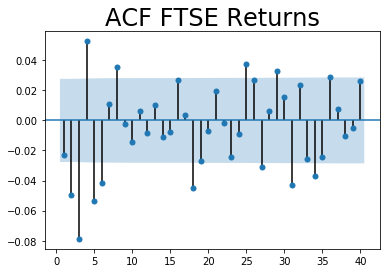

In [99]:
sgt.plot_acf(df['returns'],lags=40,zero=False)
plt.title("ACF FTSE Returns", size=24)
plt.show()

### The graph implies that consecutive values move in different directions
### This also implies that some form of natural adjustment occurring in the market

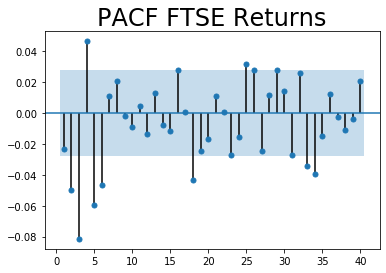

In [100]:
sgt.plot_pacf(df['returns'], lags=40,method=('ols'),zero=False)
plt.title("PACF FTSE Returns",size=24)
plt.show()

### In the graph  we see that further back we go the less relevant the data points become which is inline with our intution/logic of coeff of higher lags. The majority of effects they have on current values should already been accounted for due to the recursive nature of AR models.

### Here we see that the initial coeff are important compared to the other. As we take farther coeff they become insignificant as they are already accounted for. Also 5 out of the 6 coeff are significant, and 4 of them are negative, which suggests that market is trying to adjust.

## FITTING an AR(1) Model for Index Returns

### We follow the steps below :
### 1. Define the model specifications
### 2. Fit the data
### 3. Extract the results

In [101]:
model_ret_ar_1 = ARMA(df['returns'],order=(1,0))

In [102]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [103]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 15 Mar 2020   AIC                          15865.497
Time:                        14:35:28   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

### We observe that none  of coeff p value is less than 0.05 hence the neither is significantly different from 0.

### We observe that both the coeff and the constants p value is greater than 0.05 hence are insignificant

### Hence we conclude that the model has no real predictive power 

### The more easily yesterday's price is affected by higher lag the more inaccurate the coeff  becomes. This is because of the accumulated compounding effects of the lagged coeffs.

## HIGHER LAG AR MODELS FOR RETURNS

## AR(2) Model

In [104]:
model_ret_ar_2 = ARMA(df['returns'],order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 15 Mar 2020   AIC                          15854.911
Time:                        14:35:29   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [105]:
LLR_test(model_ret_ar_1,model_ret_ar_2)

0.0

### We observe that the p value is 0.0 proving that AR(2) is significantly better than AR(1)
### Also all the IC values are lower in AR(2) model compared to AR(1) model

## AR(3) Model 

In [106]:
model_ret_ar_3 = ARMA(df['returns'],order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sun, 15 Mar 2020   AIC                          15823.477
Time:                        14:35:29   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [107]:
LLR_test(model_ret_ar_2,model_ret_ar_3)

0.0

In [108]:
model_ret_ar_4 = ARMA(df['returns'],order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 15 Mar 2020   AIC                          15814.661
Time:                        14:35:30   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [109]:
LLR_test(model_ret_ar_3,model_ret_ar_4)

0.001

In [110]:
model_ret_ar_5 = ARMA(df['returns'],order=(5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 15 Mar 2020   AIC                          15798.779
Time:                        14:35:31   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [111]:
LLR_test(model_ret_ar_4,model_ret_ar_5)

0.0

In [112]:
model_ret_ar_6 = ARMA(df['returns'],order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 15 Mar 2020   AIC                          15789.890
Time:                        14:35:33   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [113]:
LLR_test(model_ret_ar_5,model_ret_ar_6)

0.001

In [114]:
model_ret_ar_7 = ARMA(df['returns'],order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 15 Mar 2020   AIC                          15791.294
Time:                        14:35:35   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [115]:
LLR_test(model_ret_ar_6,model_ret_ar_7)

0.44

### Since AR(7) failed at both p value and LLR test we opt for AR(6) model

## NORMALIZING PRICES AND RETURNS

### We prefer returns to prices when we are using AR model. This is due to the non stationary approach of Prices 

## In time series analysis when we use the term Normalization we mean that we consider 
## Xt as a % value of X1
## Yt as a % value of y1

## Step 1 : Set some benchmark : Interpretation is the easiest if we simply go with the value of the first period 


In [116]:
benchmark = df['market_value'].iloc[0]

In [117]:
df['norm'] = df['market_value'].div(benchmark).mul(100)

In [118]:
sts.adfuller(df['norm'])

(-1.892871013267235,
 0.3354222074330072,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

### We obseerve that the p value is higher than 0.05 hence we say that normalizing the prices did not make it stationary data

### NORMALIZING RETURNS

### We often rely on normalized returns
### They account for the absolute profitability of the investment in constrast to prices
### They allow us to compare the relative  profitability as oppossed to non normalized returns

In [119]:
bench_ret = df['returns'].iloc[0]
df['norm_ret'] = df['returns'].div(bench_ret).mul(100)

In [120]:
sts.adfuller(df['norm_ret'])

(-12.770265719497257,
 7.798058336037547e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124897)

### We conclude that normalizing does not affect stationarity

##  MODEL SELECTION FOR NORMALIZED RETURNS

In [121]:
model_norm_ret_ar_1 = ARMA(df['norm_ret'],order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Sun, 15 Mar 2020   AIC                          80709.487
Time:                        14:35:38   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

In [122]:
model_norm_ret_ar_2 = ARMA(df['norm_ret'],order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Sun, 15 Mar 2020   AIC                          80698.901
Time:                        14:35:39   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

## Normalizing had an impact on the constant and not on any of the lagged coeffs
## Using normalized values has no impact on model selection

### What conclusion do we draw when it comes to AR models and Normalizing?
### Normalization has no effect on the order of the optimal AR model regardless of the data set

##  EXAMINING THE AR MODEL RESIDUALS

## We will now focus on the residuals of the chosen models , examine a summary of the statistics and check if they are stationary. Ideally the residuals should follow a random walk process

In [123]:
df['res_price']=results_ar_7.resid

In [124]:
df.head()

,market_value,returns,norm,norm_ret,res_price
date,,,,,
1994-01-10,3440.58,-0.156704,100.000000,100.000000,-7.914899
1994-01-11,3413.77,-0.779229,99.220771,497.260711,-29.381398
1994-01-12,3372.02,-1.222988,98.007313,780.443046,-44.890788
1994-01-13,3360.01,-0.356166,97.658244,227.285567,-16.928467
1994-01-14,3400.56,1.206842,98.836824,-770.139292,34.156364


In [125]:
df['res_price'].mean()

0.279882772141515

In [126]:
df['res_price'].var()

3468.2910171997596

In [127]:
sts.adfuller(df['res_price'])

(-70.8188986127526,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.69189242178)

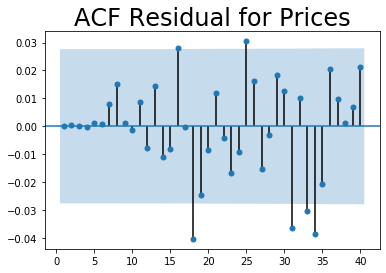

In [128]:
sgt.plot_acf(df['res_price'],lags=40,zero=False)
plt.title("ACF Residual for Prices", size=24)
plt.show()

Text(0.5, 1.0, 'Residual Plot TS')

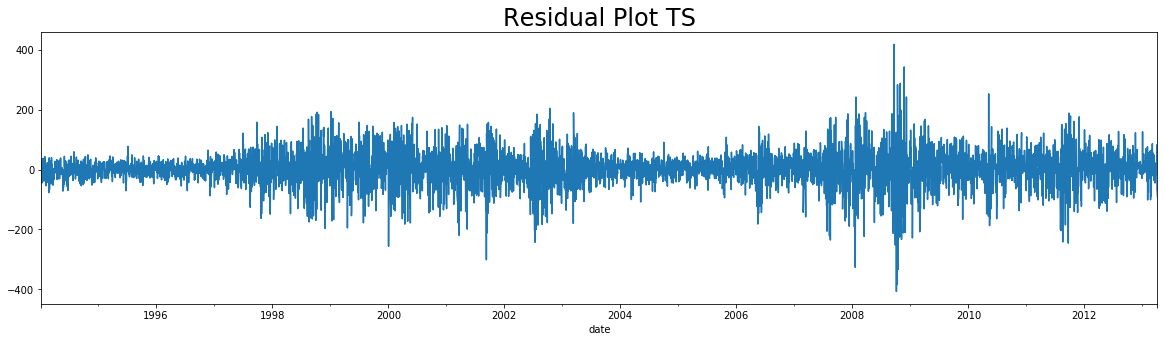

In [129]:
df['res_price'].plot(figsize= (20,5))
plt.title('Residual Plot TS', size=24)

### We now repeat the same for Returns data

In [130]:
df['res_returns']=results_ret_ar_6.resid

In [131]:
df['res_returns'].mean()

-5.373101380176701e-05

In [132]:
df['res_returns'].var()

1.3559802110652683

In [133]:
sts.adfuller(df['res_returns'])

(-70.78380221679323,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834128934)

### This data is similar to white noise with mean close to zero and variance close to 1 and a p value of zero which signifies stationary data

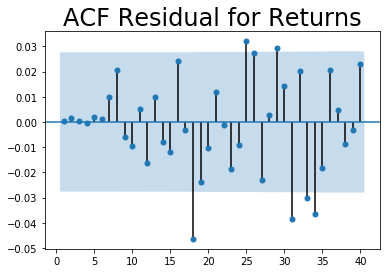

In [134]:
sgt.plot_acf(df['res_returns'],lags=40,zero=False)
plt.title("ACF Residual for Returns", size=24)
plt.show()

Text(0.5, 1.0, 'Residual Plot  Returns TS')

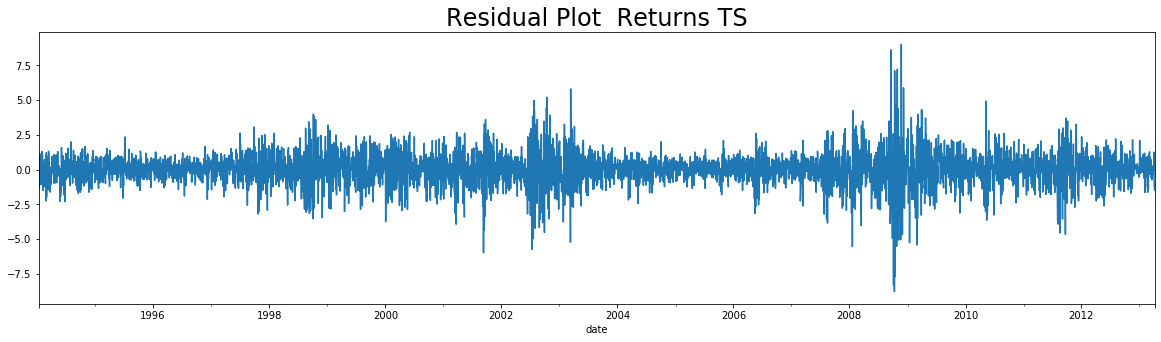

In [135]:
df['res_returns'].plot(figsize= (20,5))
plt.title('Residual Plot  Returns TS', size=24)

### Q. Why do we plot the ACF and/or PACF of the residuals from a fitted model?
### If the residuals are non-random(not white noise) then there is a pattern that needs to be accounted for.

## UNEXPECTED SHOCKS FROM PAST PERIOD

## When we have auto correcting models we can make better predictions
## The more the errors we examine the better or more adaptable our model becomes.

### These  kind of models are called MA or Moving Average models

### The MA Models do extremely well in predicting Random Walk data

# Adjusting to Shocks: THE Moving Average(MA) Model

### A Simple MA model looks like 
### $r_{t}$ = c + $\theta_{t-1}*\epsilon_{t-1}$ +$\epsilon_{t}$
### $r_{t}$  = represents the value of r in the current period
###  $\theta_{t-1}$ = is a numeric coeff for the value associated with the first lag
###  $\epsilon_{t-1}$ = is the residual for the past period
###  $\epsilon_{t}$ = is the residual for the current period

## A simple MA(1) is th same as an AR($\infty$) with certain restrictions

### The difference between AR and MA model is that in the AR model we have 
###  $x_{t}$ = $\varphi *x_{t-1}$ +  $C$ + $\epsilon_{t}$
### In MA model we have :
### $x_{t}$ = c + $\theta_{t-1}*\epsilon_{t-1}$ +$\epsilon_{t}$

### Here we see that other than the constant C and eplsilon at t the only difference between the 2 models is AR considers the variable at t-1 whereas MA model considers the residual epsilon at period t-1

### In both the models we have phi and theta should be less than 1 so as to prevent it from compounding effects and exploding in its magnitude

### In the AR model we relied on the PACF values but in the MA model we will rely on the ACF values

### This is because the MA model does not depend on past values of the variable hence determing which lagged values have a significant direct effect on the present day ones is not relevant.

## How is the MA model different from the AR model?

## The MA model includes past residuals while the AR model includes the past values

# Fitting an MA(1) Model for returns

## Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
sns.set()

## Importing data and Preprocessing

In [137]:
raw_csv_data= pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp['date']= pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [138]:
df_comp['market_value']=df_comp['ftse']

In [139]:
df_comp.columns

Index(['spx', 'dax', 'ftse', 'nikkei', 'market_value'], dtype='object')

In [140]:
del df_comp['spx']; del df_comp['dax']; del df_comp['ftse']; del df_comp['nikkei']

In [141]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [142]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [143]:
df['returns'] = df.market_value.pct_change(1)*100 

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


### Previously we removed the first row to avoid Nan value but losing data is a practice we want to avoid

## ACF for Returns 

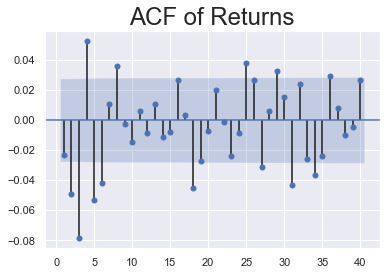

In [145]:
sgt.plot_acf(df['returns'][1:],zero=False,lags=40)
plt.title("ACF of Returns", size=24)
plt.show()

## MA(1) Model

In [146]:
model_ret_ma_1= ARMA(df['returns'][1:],order=(0,1))
results_ret_ma_1= model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 15 Mar 2020   AIC                          15865.190
Time:                        14:35:44   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8547           +0.0000j           38.8547            0.0000
-----------------------------------------------------------------------------
"""

## We observe that the p value is significant at the 10% level but not at the 5% level

### The [1:] above  uses all the values from the 'return' column after the first one
### We are simultaneously are keeping the entire data and also taking care of the no Nan values in the data requirement
### The order parameter has to be changed ARMA(order=(P ,Q)) 
### P represents AR components
### Q represents MA components

#### Question : What is the most important change we make when switching from an AR(1) model to an MA(1) model?
#### We change the order parameter from (1,0) to (0,1)

## Higher-Lag MA Models for Returns

In [147]:
model_ret_ma_2= ARMA(df['returns'][1:],order=(0,2))
results_ret_ma_2= model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_1,model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 15 Mar 2020   AIC                          15853.728
Time:                        14:35:44   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

### Hence from the p values and LLR Test we can say that MA(2) is better than MA(1)

In [148]:
model_ret_ma_3= ARMA(df['returns'][1:],order=(0,3))
results_ret_ma_3= model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_2,model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sun, 15 Mar 2020   AIC                          15818.634
Time:                        14:35:45   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

### Hence from the p values and LLR Test we can say that MA(3) is better than MA(2)

In [149]:
model_ret_ma_4= ARMA(df['returns'][1:],order=(0,4))
results_ret_ma_4= model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_3,model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 15 Mar 2020   AIC                          15809.547
Time:                        14:35:47   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

### Hence from the p values and LLR Test we can say that MA(4) is better than MA(3)

In [150]:
model_ret_ma_5= ARMA(df['returns'][1:],order=(0,5))
results_ret_ma_5= model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_4,model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 15 Mar 2020   AIC                          15799.645
Time:                        14:35:51   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

### Hence from the p values and LLR Test we can say that MA(5) is better than MA(4)

In [151]:
model_ret_ma_6= ARMA(df['returns'][1:],order=(0,6))
results_ret_ma_6= model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_5,model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 15 Mar 2020   AIC                          15794.442
Time:                        14:35:56   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

### Hence from the p values and LLR Test we can say that MA(6) is better than MA(5)

In [152]:
model_ret_ma_7= ARMA(df['returns'][1:],order=(0,7))
results_ret_ma_7= model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_6,model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sun, 15 Mar 2020   AIC                          15796.091
Time:                        14:36:05   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

### Hence  in MA(7) we see that p value is non significant and it fails the LLR test,we can say that MA(6) is better than MA(7)

## In the ACF graph we saw that 8th lag was significant so  we need to check that  

In [153]:
model_ret_ma_8= ARMA(df['returns'][1:],order=(0,8))
results_ret_ma_8= model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR Test p value: "+ str(LLR_test(model_ret_ma_7,model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 15 Mar 2020   AIC                          15791.205
Time:                        14:36:17   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

### Hence from the p values and LLR Test we can say that MA(8) is better than MA(7)

### Now we need to check if MA(8) is better than MA(6) hence we use LLR test

In [154]:
LLR_test(model_ret_ma_6,model_ret_ma_8,DF=2)

0.027

### 0.027 < 0.05 hence  at 5% significance we can say that MA(8) is better than MA(6)

#### Question : What was the relationship between the ACF plot and the coefficients of the models as we gradually increase the order?
#### When fitting a MA(Q) model, if the Qth lag isn't significant in the ACF plot , the Qth coeff of the summary table won't be significant as well 

##  Examining the MA Model Residuals for Returns

In [155]:
df['res_ret_ma_8']=results_ret_ma_8.resid[1:]

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
print("The mean of residual is: " +str(round(df['res_ret_ma_8'].mean(),3))+"\nThe variance of residual is: "+ str(round(df['res_ret_ma_8'].var(),3)))

The mean of residual is: -0.0
The variance of residual is: 1.356


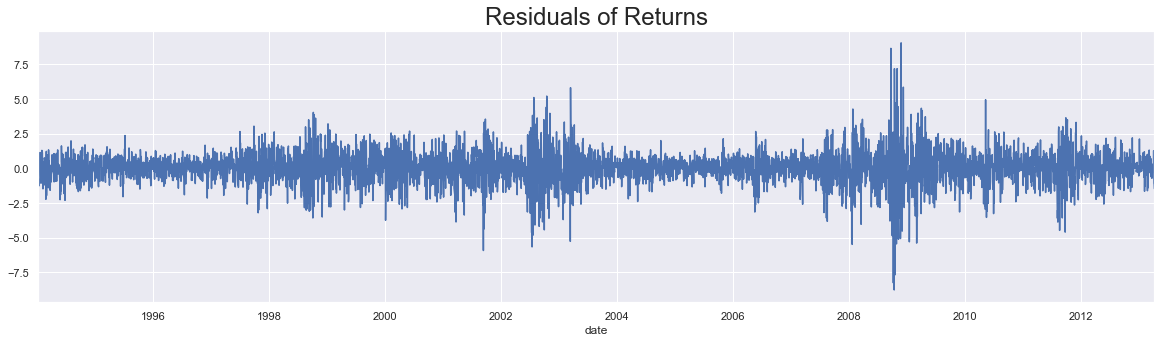

In [157]:
df['res_ret_ma_8'].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=24)
plt.show()

### We will use Dickey Fuller test to check for Stationarity of the data

In [158]:
sts.adfuller(df['res_ret_ma_8'][2:])

(-70.8358160188982,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.05218529853)

### We observe that the p value is zero hence it is stationary

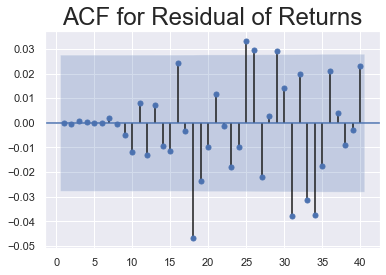

In [159]:
sgt.plot_acf(df['res_ret_ma_8'][2:],zero=False,lags=40)
plt.title("ACF for Residual of Returns",size=24)
plt.show()

### Markets adjust to shocks so values far in the past lose relevance

#### Why do we like to estimate the standard deviation of the residuals?
#### Ans: So that we know how far off we can hypothetically be with our predictions.Using the 3 std deviation rule we can check where 99.7% of data falls into (Normal distribution 68-95-99.7 rule)


## Model Selection for  Normalized Returns(MA)

In [160]:
bench_ret = df['returns'].iloc[1]
df['norm_ret'] = df['returns'].div(bench_ret).mul(100)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


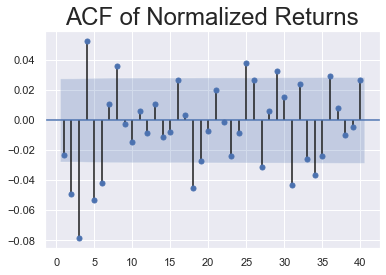

In [161]:
sgt.plot_acf(df['norm_ret'][1:],zero=False,lags=40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [162]:
model_norm_ret_ma_8 = ARMA(df['norm_ret'][1:],order=(0,8))
results_norm_ret_ma_8=model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sun, 15 Mar 2020   AIC                          80635.194
Time:                        14:36:44   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.311       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

### We see same coeff hence normalizing the input data does not affect  model selection

In [163]:
    df['res_norm_ret_ma_8']=results_ret_ma_8.resid[1:]

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


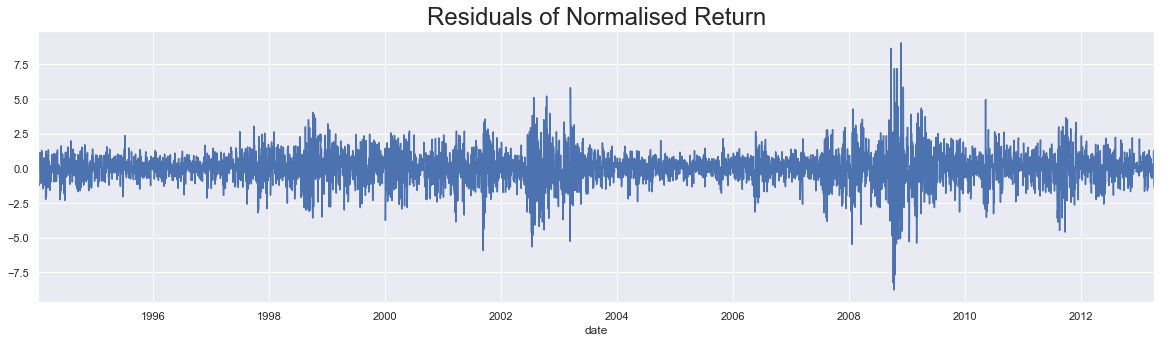

In [164]:
df['res_norm_ret_ma_8'][1:].plot(figsize=(20,5))
plt.title("Residuals of Normalised Return",size=24)
plt.show()

In [165]:
model_ret_ar_1_ma_1= ARMA(df['returns'][1:],order=(1,1))
results_ret_ar_1_ma_1= model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())


                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 15 Mar 2020   AIC                          15841.000
Time:                        14:36:52   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -

In [166]:
LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1)

0.0

In [167]:
LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1)

0.0

In [168]:
model_ret_ar_3_ma_3= ARMA(df['returns'][1:],order=(3,3))
results_ret_ar_3_ma_3= model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 15 Mar 2020   AIC                          15803.030
Time:                        14:37:00   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     

In [169]:
model_ret_ar_2_ma_3= ARMA(df['returns'][1:],order=(2,3))
results_ret_ar_2_ma_3= model_ret_ar_2_ma_3.fit()
print(results_ret_ar_2_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 15 Mar 2020   AIC                          15805.174
Time:                        14:37:06   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     

In [170]:
model_ret_ar_3_ma_2= ARMA(df['returns'][1:],order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
print(results_ret_ar_3_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sun, 15 Mar 2020   AIC                          15805.495
Time:                        14:37:08   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     

In [171]:
model_ret_ar_2_ma_2= ARMA(df['returns'][1:],order=(2,2))
results_ret_ar_2_ma_2= model_ret_ar_2_ma_2.fit()
print(results_ret_ar_2_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Sun, 15 Mar 2020   AIC                          15838.446
Time:                        14:37:11   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     

In [172]:
model_ret_ar_1_ma_3= ARMA(df['returns'][1:],order=(1,3))
results_ret_ar_1_ma_3= model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 15 Mar 2020   AIC                          15805.676
Time:                        14:37:14   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

In [173]:
model_ret_ar_1_ma_3= ARMA(df['returns'][1:],order=(1,3))
results_ret_ar_1_ma_3= model_ret_ar_1_ma_3.fit()
print(results_ret_ar_1_ma_3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 15 Mar 2020   AIC                          15805.676
Time:                        14:37:17   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

In [174]:
model_ret_ar_3_ma_1= ARMA(df['returns'][1:],order=(3,1))
results_ret_ar_3_ma_1= model_ret_ar_3_ma_1.fit()
print(results_ret_ar_3_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 15 Mar 2020   AIC                          15810.144
Time:                        14:37:19   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     

In [175]:
model_ret_ar_1_ma_2= ARMA(df['returns'][1:],order=(1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
print(results_ret_ar_1_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 2)   Log Likelihood               -7913.670
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 15 Mar 2020   AIC                          15837.341
Time:                        14:37:20   BIC                          15869.947
Sample:                    01-10-1994   HQIC                         15848.766
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.410      0.158      -0.007       0.045
ar.L1.returns     0.6169      0.100      6.191      0.000       0.422       0.812
ma.L1.returns    -0.6471      0.100     

In [176]:
model_ret_ar_2_ma_1= ARMA(df['returns'][1:],order=(2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
print(results_ret_ar_2_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 1)   Log Likelihood               -7913.456
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sun, 15 Mar 2020   AIC                          15836.913
Time:                        14:37:22   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.returns     0.6541      0.093      7.068      0.000       0.473       0.835
ar.L2.returns    -0.0433      0.017     

# ARIMA

In [177]:
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2

In [181]:
model_ret_ar_1_i_1_ma_1 = ARIMA(df['returns'][1:],order=(1,1,1))
results_ret_ar_1_i_1_ma_1 = model_ret_ar_1_i_1_ma_1.fit()
results_ret_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7932.934
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 15 Mar 2020   AIC                          15873.868
Time:                        14:49:02   BIC                          15899.952
Sample:                    01-11-1994   HQIC                         15883.009
                         - 04-05-2013                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.245e-06   1.12e-05     -0.200      0.841   -2.42e-05    1.97e-05
ar.L1.D.returns    -0.0229      0.014     -1.621      0.105      -0.051       0.005
ma.L1.D.returns    -1.0000      0.001  -1735.727      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.7016           +0.0000j           43.7016            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [189]:
model_ret_ar_3_i_1_ma_4 = ARIMA(df['returns'][1:],order=(3,1,4))
results_ret_ar_3_i_1_ma_4 = model_ret_ar_3_i_1_ma_4.fit()
results_ret_ar_3_i_1_ma_4.summary()

C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ADMIN\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 5019
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -7908.653
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sun, 15 Mar 2020   AIC                          15835.305
Time:                        15:04:25   BIC                          15893.994
Sample:                    01-11-1994   HQIC                         15855.871
                         - 04-05-2013                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.183e-06   8.79e-06     -0.248      0.804   -1.94e-05     1.5e-05
ar.L1.D.returns    -0.0002      0.009     -0.022      0.982      -0.017       0.017
ar.L2.D.returns     0.4437      0.094      4.714      0.000       0.259       0.628
ar.L3.D.returns    -0.0450        nan        nan        nan         nan         nan
ma.L1.D.returns    -1.0311        nan        nan        nan         nan         nan
ma.L2.D.returns    -0.4449      0.088     -5.083      0.000      -0.616      -0.273
ma.L3.D.returns     0.4473      0.081      5.491      0.000       0.288       0.607
ma.L4.D.returns     0.0286        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4043           +0.0000j            1.4043            0.5000
AR.2            1.6449           +0.0000j            1.6449            0.0000
AR.3            9.6156           +0.0000j            9.6156            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.3635           +0.0000j            1.3635            0.0000
MA.3           -1.5591           +0.0000j            1.5591            0.5000
MA.4          -16.4211           +0.0000j           16.4211            0.5000
-----------------------------------------------------------------------------
"""

In [195]:
model_ret_ar_3_i_1_ma_4 = ARIMA(df['returns'][1:],order=(3,1,3))
results_ret_ar_3_i_1_ma_4 = model_ret_ar_3_i_1_ma_4.fit()
results_ret_ar_3_i_1_ma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.returns   No. Observations:                 5019
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -7900.188
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sun, 15 Mar 2020   AIC                          15816.376
Time:                        15:06:49   BIC                          15868.543
Sample:                    01-11-1994   HQIC                         15834.656
                         - 04-05-2013                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -1.37e-06   1.67e-05     -0.082      0.935   -3.41e-05    3.13e-05
ar.L1.D.returns    -0.7126      0.085     -8.345      0.000      -0.880      -0.545
ar.L2.D.returns    -0.6482      0.097     -6.674      0.000      -0.839      -0.458
ar.L3.D.returns    -0.1061      0.016     -6.657      0.000      -0.137      -0.075
ma.L1.D.returns    -0.3078      0.086     -3.595      0.000      -0.476      -0.140
ma.L2.D.returns    -0.0999      0.089     -1.121      0.262      -0.275       0.075
ma.L3.D.returns    -0.5907      0.101     -5.850      0.000      -0.789      -0.393
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4737           -1.2654j            1.3512           -0.3070
AR.2           -0.4737           +1.2654j            1.3512            0.3070
AR.3           -5.1636           -0.0000j            5.1636           -0.5000
MA.1            1.0007           -0.0000j            1.0007           -0.0000
MA.2           -0.5849           -1.1617j            1.3007           -0.3242
MA.3           -0.5849           +1.1617j            1.3007            0.3242
-----------------------------------------------------------------------------
"""

In [200]:
df['res_ret_ma_8']=results_ret_ar_1_i_1_ma_1.resid[1:]

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [202]:
df['res_ret_ma_8'].mean(),df['res_ret_ma_8'].var()

(6.360921172790622e-05, 2.154024464945004)

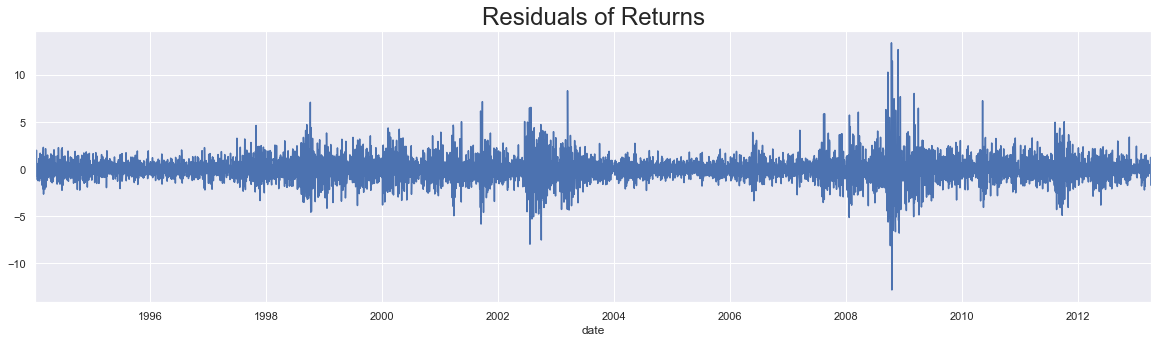

In [203]:
df['res_ret_ma_8'].plot(figsize=(20,5))
plt.title("Residuals of Returns",size=24)
plt.show()

# ARCH Autoregressive Conditional Heteroskedasticity Method

In [1]:
from arch import arch_model

ModuleNotFoundError: No module named 'arch'

In [208]:
model = arch_model(df['returns'][1:],mean='zero',vol='ARCH')

In [209]:
model_fit=model.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: 7664.245338623477
Iteration:      2,   Func. Count:     11,   Neg. LLF: 7663.044590176771
Iteration:      3,   Func. Count:     17,   Neg. LLF: 7662.946103419101
Iteration:      4,   Func. Count:     21,   Neg. LLF: 7662.934735872448
Iteration:      5,   Func. Count:     25,   Neg. LLF: 7662.9347317604725
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7662.934731760461
            Iterations: 5
            Function evaluations: 25
            Gradient evaluations: 5


In [210]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Zero Mean - ARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7662.93
Distribution:                  Normal   AIC:                           15329.9
Method:            Maximum Likelihood   BIC:                           15342.9
                                        No. Observations:                 5020
Date:                Sun, Mar 15 2020   Df Residuals:                     5018
Time:                        16:20:38   Df Model:                            2
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9244  4.332e-02     21.340 4.807e-101 [  0.839,  1.009]
alpha[1]       0.3640  4.945e-02      7.361  1.825e-13 [  0.267,  0.461]
========================================================================

Covariance estimator: robust
"""

In [211]:
model = arch_model(df['returns'][1:],mean='zero',vol='GARCH')

In [214]:
model_fit=model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6993.154491642117
Iteration:      2,   Func. Count:     13,   Neg. LLF: 6991.271662039034
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6982.798295339686
Iteration:      4,   Func. Count:     25,   Neg. LLF: 6980.946909822851
Iteration:      5,   Func. Count:     31,   Neg. LLF: 6979.5791061831305
Iteration:      6,   Func. Count:     37,   Neg. LLF: 6978.724381072827
Iteration:      7,   Func. Count:     43,   Neg. LLF: 6978.2430342945945
Iteration:      8,   Func. Count:     49,   Neg. LLF: 6978.125942260995
Iteration:      9,   Func. Count:     55,   Neg. LLF: 6978.060042602367
Iteration:     10,   Func. Count:     60,   Neg. LLF: 6978.05992880182
Iteration:     11,   Func. Count:     65,   Neg. LLF: 6978.059926398295
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6978.059926398435
            Iterations: 11
            Function evaluations: 65
            Gradient evaluations: 

In [215]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6978.06
Distribution:                  Normal   AIC:                           13962.1
Method:            Maximum Likelihood   BIC:                           13981.7
                                        No. Observations:                 5020
Date:                Sun, Mar 15 2020   Df Residuals:                     5017
Time:                        16:36:30   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0106  2.914e-03      3.646  2.664e-04 [4.913e-03,1.633e-02]
alpha[1]       0.0816  1.019e-02      8.011  1.142e-15   [6.164e-02,  0.102]
beta[1]        0.9109  1.088e-02     83.717      0.000     [  0.890,  0.932]
============================================================================

Covariance estimator: robust
"""